# Workshop - 2: Prediction Using Unsupervised ML

### Bibhuti bhusan sahoo  
### GRIPFEB21
We have to perdict the optimum no of clusters and repersent its visually

### Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#for dividing the data into cluster based on pattern of the data
from sklearn.cluster import KMeans
#for scaling the data in between 0 to 1
from sklearn.preprocessing import MinMaxScaler

### Load the iris dataset

In [66]:
ir = pd.read_csv("Iris.csv")
ir.head(10)# See the first 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [67]:
ir.shape

(150, 6)

In [68]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
ir.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [70]:
ir.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Plotting the results onto a Heat Map

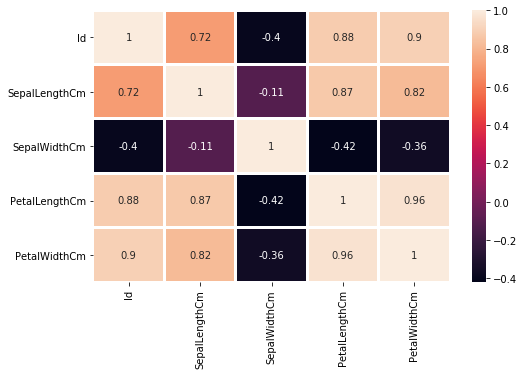

In [71]:
plt.figure(figsize=(8,5))

sns.heatmap(ir.corr(),annot=True,linewidth=2)

### Plotting the results onto a Pair Plot

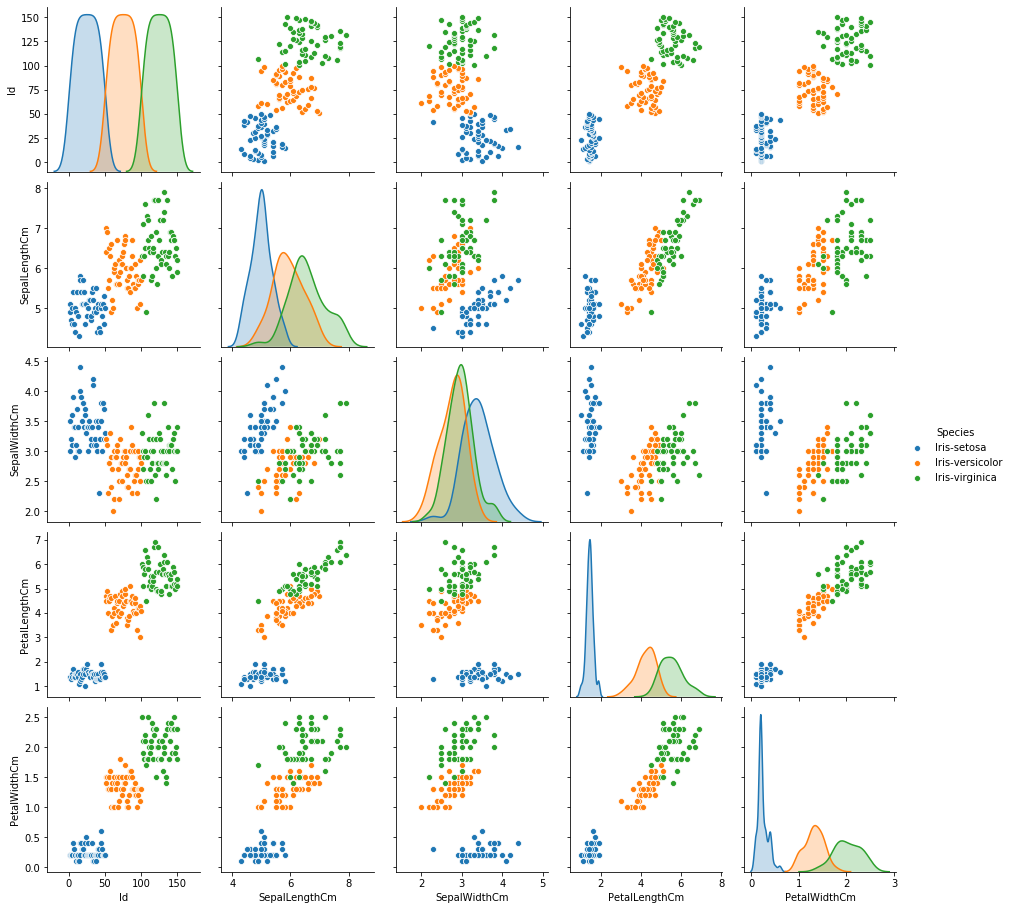

In [72]:
sns.pairplot(ir,hue="Species")

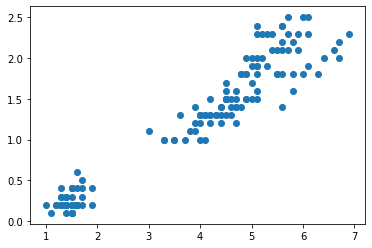

In [73]:
plt.scatter(ir['PetalLengthCm'],ir['PetalWidthCm'])

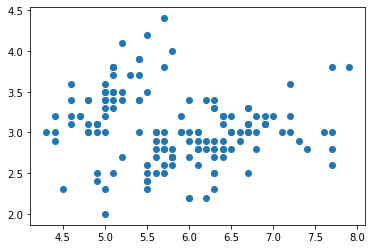

In [74]:
plt.scatter(ir['SepalLengthCm'],ir['SepalWidthCm'])

### To selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

In [75]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(ir[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Add cluster column in given data set.

In [76]:
ir['cluster']=y_predicted
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [77]:
df1 = ir[ir.cluster==0]
df2 = ir[ir.cluster==1]
df3 = ir[ir.cluster==2]

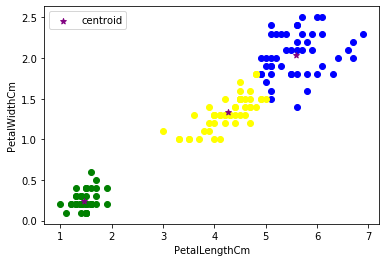

In [78]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

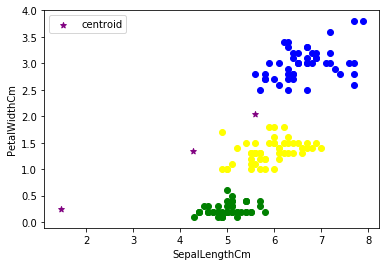

In [79]:
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='blue')
plt.scatter(df2['SepalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['SepalLengthCm'],df3['PetalWidthCm'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

### Plotting the results onto a line graph

In [80]:
# `allowing us to observe 'The elbow'
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(ir[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)
sse

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.48238901098901,
 13.999613141025641,
 11.084846431864282,
 9.542034743552595,
 7.805931164868695,
 6.472894541406307]

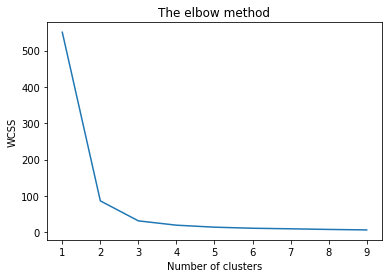

In [81]:
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.plot(k_rng,sse)

### Applying kmeans to the dataset / Creating the kmeans classifier

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

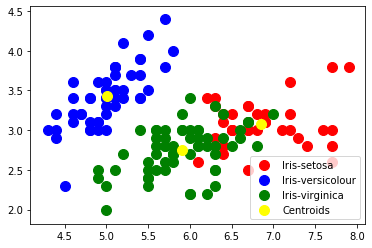

In [83]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()